<a href="https://colab.research.google.com/github/sandeshchand/neuralnetwork/blob/main/Neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.5.0'

In [ ]:
keras.__version__

'2.5.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
(X_train_full).dtype

dtype('uint8')

In [ ]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

NameError: ignored

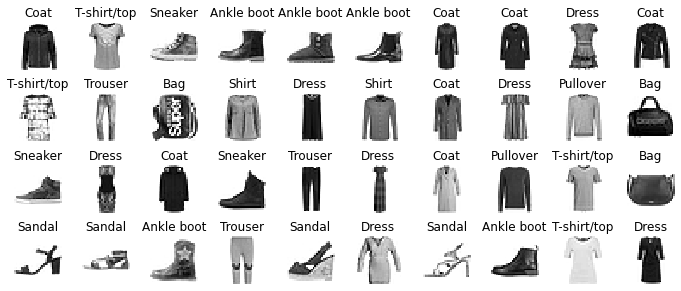

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [ ]:
for i in range(0,10):
  #print(i)
  print(class_names[y_train[i]])



Coat
T-shirt/top
Sneaker
Ankle boot
Ankle boot
Ankle boot
Coat
Coat
Dress
Coat


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
history =  model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7165 - accuracy: 0.7635 - val_loss: 0.5130 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4851 - accuracy: 0.8307 - val_loss: 0.4615 - val_accuracy: 0.8416
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4395 - accuracy: 0.8448 - val_loss: 0.4279 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4107 - accuracy: 0.8554 - val_loss: 0.4336 - val_accuracy: 0.8414
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3921 - accuracy: 0.8615 - val_loss: 0.3944 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3762 - accuracy: 0.8666 - val_loss: 0.3838 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3622 - accuracy: 0.8712 - val_loss: 0.3548 - val_accuracy:

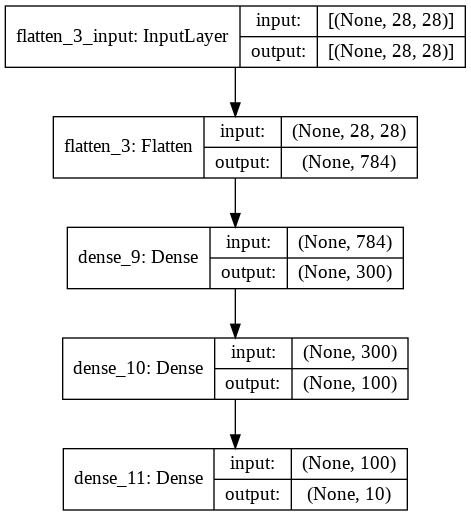

In [ ]:

keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
weight,biases = hidden1.get_weights()
print(weight)
print(weight.shape)

[[ 6.4181656e-02  3.6074605e-02 -5.6209058e-02 ...  1.1405921e-02
   4.3286774e-02  4.2215653e-02]
 [-6.7806698e-02 -6.2378678e-03  2.0976290e-02 ... -5.3939284e-03
  -2.0846261e-02  6.7775056e-02]
 [ 2.2948492e-02  5.0750669e-02  3.2746278e-02 ...  5.0451729e-02
  -7.4387266e-05 -1.3354992e-02]
 ...
 [ 8.2209632e-03  4.7963370e-02 -3.3303849e-02 ... -1.6644830e-02
   5.1075317e-02  3.7989594e-02]
 [ 4.2913273e-02 -6.8089247e-02  3.8041357e-02 ...  3.3962440e-02
   4.9116213e-02  5.8678858e-02]
 [ 8.3796307e-03  6.2482662e-02 -3.2400809e-02 ... -7.0907436e-02
   3.0361474e-02 -4.5654159e-02]]
(784, 300)


In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

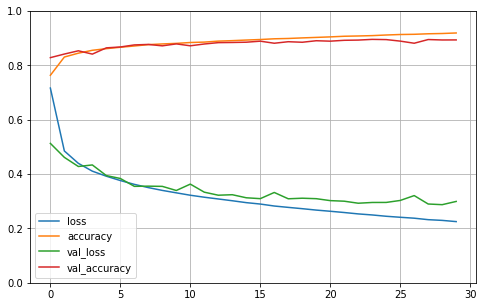

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8848


[0.3305554687976837, 0.8848000168800354]

In [ ]:
X_new = X_test[:3]
#print(X_new)
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_predict = model.predict_classes(X_new)
np.array(class_names)[y_predict]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
import numpy as np
y_new =y_test[:3]
np.array(class_names)[y_predict]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Building a regression MLP Using the sequential API


In [ ]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30,activation="relu",input_shape= X_train.shape[1:]),
                                 keras.layers.Dense(1)
])

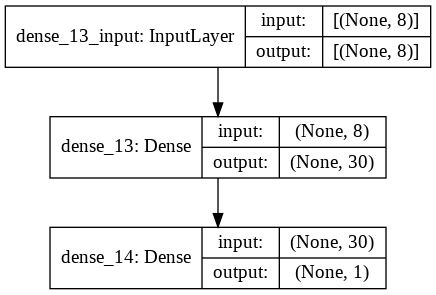

In [ ]:
keras.utils.plot_model(model, "housepredict_model.png", show_shapes=True)

In [ ]:
model.compile(loss="mean_squared_error",optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7294 - val_loss: 15.9921
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6180 - val_loss: 9.6009
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5292 - val_loss: 0.4534
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3957 - val_loss: 0.3639
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3849 - val_loss: 0.3605
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3776 - val_loss: 0.3825
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3765 - val_loss: 0.3767
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3689 - val_loss: 0.3864
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3649 - val_loss: 0.4068
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3633 - val_loss: 0.381

In [ ]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 1ms/step - loss: 0.3437


In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1094 - val_loss: 1.0289
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7849 - val_loss: 0.6881
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6517 - val_loss: 0.6039
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5965 - val_loss: 0.5446
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5595 - val_loss: 0.5129
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5311 - val_loss: 0.4873
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5084 - val_loss: 0.4673
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4898 - val_loss: 0.4499
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4748 - val_loss: 0.4373
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4641 - val_loss: 0.4269

In [ ]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4183


In [ ]:
y_pred = model.predict((X_new_A, X_new_B))
y_predict

array([9, 2, 1])

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5057 - val_loss: 11.3365
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8416 - val_loss: 4.4099
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6223 - val_loss: 1.9389
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5584 - val_loss: 0.7970
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4974 - val_loss: 0.4442
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4636 - val_loss: 0.4479
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4434 - val_loss: 0.4029
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4306 - val_loss: 0.4147
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4216 - val_loss: 0.4231
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4162 - val_l

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
"n_hidden": [0, 1, 2, 3],
"n_neurons": np.arange(1, 100),
"learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.4278 - val_loss: 1.6193
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1260 - val_loss: 0.8092
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7267 - val_loss: 0.7039
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6445 - val_loss: 0.6564
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6196 - val_loss: 0.6367
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6042 - val_loss: 0.8624
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5973 - val_loss: 0.7905
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5889 - val_loss: 0.8004
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5838 - val_loss: 0.5974
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5733 - val_lo

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f98d1d18f90>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f98c76f2e10>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 1...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_